In [19]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [20]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [21]:
tokenizer = info.features['text'].encoder
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 3
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)




Epoch 1/3
391/391 [==============================] - 2007s 5s/step - loss: 0.6214 - accuracy: 0.6186 - val_loss: 0.5237 - val_accuracy: 0.7548
Epoch 2/3
391/391 [==============================] - 2001s 5s/step - loss: 0.3833 - accuracy: 0.8425 - val_loss: 0.3691 - val_accuracy: 0.8557
Epoch 3/3
391/391 [==============================] - 2032s 5s/step - loss: 0.2612 - accuracy: 0.8994 - val_loss: 0.3837 - val_accuracy: 0.8346


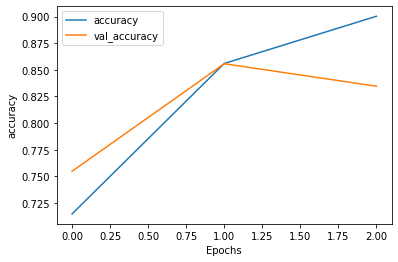

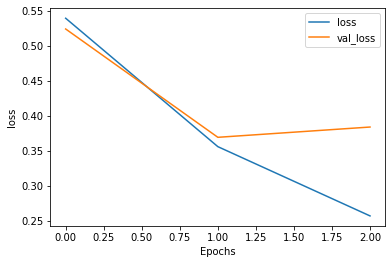

In [29]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 3
history_lstm = model_lstm.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)



Epoch 1/3
391/391 [==============================] - 2221s 6s/step - loss: 0.6265 - accuracy: 0.6352 - val_loss: 0.5048 - val_accuracy: 0.7821
Epoch 2/3
391/391 [==============================] - 2240s 6s/step - loss: 0.5673 - accuracy: 0.7136 - val_loss: 0.5722 - val_accuracy: 0.7555
Epoch 3/3
391/391 [==============================] - 2227s 6s/step - loss: 0.4325 - accuracy: 0.8075 - val_loss: 0.4609 - val_accuracy: 0.8084


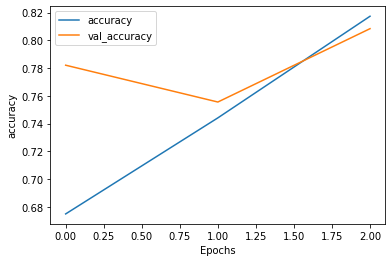

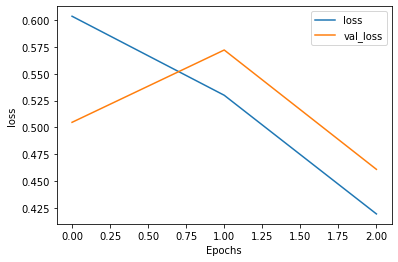

In [30]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')